In [9]:
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
from biopandas.pdb import PandasPdb
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
%matplotlib inline

location_inf_49 = '/home/rachael/Desktop/Das_Lab/CASP/exp/data'
location_inf_56 = '/home/rachael/Desktop/Das_Lab/CASP/exp/R1156/data'

## R1149

### obtain inf data

rna_calc_inf.py *pdb -t R1149TSex0_0.pdb --renumber-residues

In [27]:
# read inf data
cols = ['chainA','resnumA','chainB','resnumB','x','resA','resB','type','num']

def get_junction_info(df):
    SL5bp = len(df[(df.resnumA==24) & (df.resnumB==105)])
    SL5abp = len(df[(df.resnumA==25) & (df.resnumB==69)])
    SL5bbp = len(df[(df.resnumA==70) & (df.resnumB==94)])
    SL5cbp = len(df[(df.resnumA==95) & (df.resnumB==104)])
    SL5bp2 = len(df[(df.resnumA==23) & (df.resnumB==106)])
    SL5abp2 = len(df[(df.resnumA==26) & (df.resnumB==68)])
    SL5bbp2 = len(df[(df.resnumA==71) & (df.resnumB==93)])
    SL5cbp2 = len(df[(df.resnumA==96) & (df.resnumB==103)])
    
    SL5_SL5c = len(df[(df.resnumA==24) & (df.resnumB==95)])
    SL5a_SL5b = len(df[(df.resnumA==25) & (df.resnumB==94)])
    SL5_SL5c2 = len(df[(df.resnumA==104) & (df.resnumB==105)])
    SL5a_SL5b2 = len(df[(df.resnumA==69) & (df.resnumB==70)])
    
    SL5_SL5a = len(df[(df.resnumA==24) & (df.resnumB==25)])
    SL5b_SL5c = len(df[(df.resnumA==70) & (df.resnumB==104)])
    SL5_SL5a2 = len(df[(df.resnumA==69) & (df.resnumB==105)])
    SL5b_SL5c2 = len(df[(df.resnumA==94) & (df.resnumB==95)])
    return [SL5bp,SL5abp,SL5bbp,SL5cbp,SL5bp2,SL5abp2,SL5bbp2,SL5cbp2,SL5_SL5c,SL5_SL5c2,SL5a_SL5b,SL5a_SL5b2,SL5_SL5a,SL5_SL5a2,SL5b_SL5c,SL5b_SL5c2]

data = []
#for i in range(10):
#    df = pd.read_csv(f'R11149_{i}.pdb_DOCKED.pdb.outCR',names=cols,skiprows=[0,1],delim_whitespace=True)
#    data.append([f'data/R11149_{i}.pdb_DOCKED.pdb.outCR']+get_junction_info(df))
for f in glob(f'{location_inf_49}/R1149TS???_?.pdb.outCR'):
    df = pd.read_csv(f,names=cols,skiprows=[0,1],delim_whitespace=True)
    data.append([f]+get_junction_info(df))

cols = ['pdb','SL5_bp','SL5a_bp','SL5b_bp','SL5c_bp','SL5_bp2','SL5a_bp2','SL5b_bp2','SL5c_bp2','SL5_SL5c','SL5_SL5c2','SL5a_SL5b','SL5a_SL5b2','SL5_SL5a','SL5_SL5a2','SL5b_SL5c','SL5b_SL5c2']
df = pd.DataFrame(data,columns=cols)
df.pdb = df.pdb.str[-22:-10]

### obtain angular data

```
pymol *pdb
align_all()
rr()
color grey, resid 1-24 or resid 105-124
color blue, resid 25-69
color orange, resid 70-94
color red, resid 95-104
set cartoon_transparency, 0.65, *ex*
save R1149_all.pse
```

```
select res1, resid 25-94
select res2, resid 1-24 or resid 95-124
select ref1, (resid 24 or resid 95) and backbone
select ref2, (resid 25 or resid 94) and backbone
select end2a, resid 1-6 or resid 120-124
select end2b, resid 95-104
select end1a, resid 76-88
select end1b, resid 38-51
run get_all_angles.py #angle_dict
```

```
select res1, resid 24-25 and backbone
select res2, resid 94-95 and backbone
select ref1, (resid 24 or resid 95) and backbone
select ref2, (resid 25 or resid 94) and backbone
select end1a, resid 24 and backbone
select end1b, resid 25 and backbone
select end2a, resid 94 and backbone
select end2b, resid 95 and backbone
run get_all_angles.py #junction_direction
```

```
set_view (\
     0.124000251,    0.085106425,    0.988596797,\
     0.946958661,   -0.307782114,   -0.092289321,\
     0.296415776,    0.947610259,   -0.118763901,\
    -0.008014992,   -0.009917021, -311.498138428,\
   139.751068115,  168.152816772,  138.986968994,\
    88.924186707,  524.211608887,  -20.000000000 )
```

In [28]:
angle_dict = {'R11149_0.pdb_DOCKED': -85.34711159171655, 'R11149_1.pdb_DOCKED': -84.78865425628467, 'R11149_2.pdb_DOCKED': -85.67784491911772, 'R11149_3.pdb_DOCKED': -85.13123059409759, 'R11149_4.pdb_DOCKED': -84.38372682255614, 'R11149_5.pdb_DOCKED': -83.98298281033448, 'R11149_6.pdb_DOCKED': -84.73184259558974, 'R11149_7.pdb_DOCKED': -84.1080266512493, 'R11149_8.pdb_DOCKED': -84.78876773402034, 'R11149_9.pdb_DOCKED': -87.93859612740219, 'R1149TS110_2.pdb_DOCKED': 97.3127802705084, 'R1149TS128_1.pdb_DOCKED': -88.00360502770097, 'R1149TS029_1': 13.242209720550804, 'R1149TS029_2': -75.3315347560498, 'R1149TS029_3': 16.722925319972035, 'R1149TS029_4': 73.1047233041914, 'R1149TS035_1': -12.503042995355353, 'R1149TS035_2': 126.00853098177366, 'R1149TS035_3': -113.0507620749414, 'R1149TS035_4': -49.573017986884224, 'R1149TS035_5': -77.73114664519487, 'R1149TS054_1': -93.78050320258008, 'R1149TS054_2': 145.47565956377053, 'R1149TS054_3': 41.125625025850795, 'R1149TS054_4': 43.53656341110277, 'R1149TS054_5': -71.35425895798622, 'R1149TS076_1': -131.66205251282219, 'R1149TS076_2': -24.423211569455262, 'R1149TS076_3': 55.44974425144608, 'R1149TS076_4': 38.42149678743826, 'R1149TS076_5': -58.76067119397702, 'R1149TS081_1': 34.45482826117545, 'R1149TS081_2': 70.73015074996144, 'R1149TS081_3': 18.638411617856494, 'R1149TS081_4': 168.8255351719328, 'R1149TS081_5': 71.37007089351115, 'R1149TS091_1': -174.81436006226966, 'R1149TS091_2': -166.46167901094384, 'R1149TS091_3': -173.07902041382115, 'R1149TS091_4': -169.82198453926648, 'R1149TS091_5': 173.36967835758114, 'R1149TS097_1': -150.54349320209954, 'R1149TS097_2': -111.99705637394338, 'R1149TS110_1': 25.711330435862035, 'R1149TS110_2': 97.31276063572318, 'R1149TS110_3': 58.80098660942943, 'R1149TS110_4': -57.04313545806336, 'R1149TS119_1': -138.54390458768196, 'R1149TS119_2': 167.45135457043676, 'R1149TS119_3': -125.16498716937555, 'R1149TS119_4': 53.2320078727509, 'R1149TS119_5': -138.65834465301774, 'R1149TS125_1': -14.5479428441541, 'R1149TS125_2': -155.340437371097, 'R1149TS125_3': -96.7814888599103, 'R1149TS125_4': 128.79609349926008, 'R1149TS125_5': 45.47603809599384, 'R1149TS128_1': -88.00358021025912, 'R1149TS128_2': 30.889932309397786, 'R1149TS128_3': -47.394282880021066, 'R1149TS128_4': -108.17278482592909, 'R1149TS128_5': 83.96394885773401, 'R1149TS131_1': 160.291612023248, 'R1149TS131_2': 80.85603391654605, 'R1149TS131_3': 136.39050655893507, 'R1149TS131_4': -73.42486650765943, 'R1149TS131_5': -38.465055837949684, 'R1149TS147_1': 124.79512359047662, 'R1149TS147_2': 127.03323687282439, 'R1149TS147_3': 123.34841054877755, 'R1149TS147_4': 105.61200242057078, 'R1149TS147_5': 148.0456824421638, 'R1149TS177_1': 145.06798080569772, 'R1149TS185_1': 59.86527074683836, 'R1149TS185_2': 52.25922982915753, 'R1149TS185_3': 60.25189313454115, 'R1149TS185_4': 47.92896921873839, 'R1149TS185_5': 44.88584448176584, 'R1149TS227_1': 134.1716142737388, 'R1149TS227_2': -137.47147172141916, 'R1149TS227_3': 119.08435088742358, 'R1149TS227_4': 115.00340685786473, 'R1149TS227_5': 142.78876668418945, 'R1149TS229_1': -73.51929177467564, 'R1149TS229_2': -89.307042038019, 'R1149TS229_3': -42.76435864866097, 'R1149TS229_4': 84.44080286952868, 'R1149TS229_5': -78.72090818368412, 'R1149TS232_1': -41.02272387642642, 'R1149TS232_2': -38.86018739126508, 'R1149TS232_3': -37.32454000950767, 'R1149TS232_4': 142.33397164829833, 'R1149TS232_5': -104.87780483458478, 'R1149TS235_1': 32.360333067098416, 'R1149TS235_2': -39.11483595153939, 'R1149TS235_3': -33.23087314610204, 'R1149TS235_4': 38.160713156966054, 'R1149TS235_5': -17.912180846080116, 'R1149TS238_1': 51.74757294506351, 'R1149TS238_2': 59.083737880939786, 'R1149TS239_1': -71.69781607953887, 'R1149TS239_2': -77.59912992402857, 'R1149TS239_3': 66.61526501739364, 'R1149TS239_4': -49.612271182102404, 'R1149TS239_5': 73.43700543897327, 'R1149TS245_1': -102.47314034578673, 'R1149TS245_2': -141.35640324508915, 'R1149TS245_3': -88.3443723377567, 'R1149TS245_4': 124.73123690932196, 'R1149TS245_5': 136.41966474400618, 'R1149TS248_1': -112.44483068660415, 'R1149TS248_2': 34.629207718548145, 'R1149TS248_3': -18.997327798667758, 'R1149TS248_4': -19.58316341410662, 'R1149TS248_5': -18.829297649626113, 'R1149TS287_1': -138.24046034966634, 'R1149TS287_2': 131.85810231345712, 'R1149TS287_3': 102.60949624706295, 'R1149TS287_4': -60.47733157189804, 'R1149TS287_5': 18.81740644943449, 'R1149TS385_1': -102.09990051298593, 'R1149TS385_2': -141.35155826879443, 'R1149TS385_3': -87.93893860231087, 'R1149TS385_4': 124.11540954863075, 'R1149TS385_5': 136.36727610630365, 'R1149TS392_1': -134.77704985547848, 'R1149TS392_2': 13.94451968691373, 'R1149TS392_3': -156.55646821110005, 'R1149TS392_4': 51.98965724054363, 'R1149TS392_5': 33.67051218983739, 'R1149TS416_1': -20.333352908007367, 'R1149TS416_2': -36.10056957862309, 'R1149TS416_3': -96.7814888599103, 'R1149TS416_4': 128.79609349926008, 'R1149TS416_5': 45.47603809599384, 'R1149TS434_1': 128.35487435091704, 'R1149TS434_2': 124.09900295937823, 'R1149TS434_3': 121.7781383553744, 'R1149TS434_4': 119.04175303939444, 'R1149TS434_5': -134.865058715132, 'R1149TS470_1': -32.1453863002835, 'R1149TS470_2': -38.338231058924144, 'R1149TS470_3': -30.605313249163302, 'R1149TS470_4': -33.665421535359755, 'R1149TS470_5': -47.80905340957034, 'R1149TS489_1': -32.1453863002835, 'R1149TS489_2': -38.338231058924144, 'R1149TS489_3': -30.605313249163302, 'R1149TS489_4': -33.665421535359755, 'R1149TS489_5': -47.80905340957034, 'R1149TSex0_0': -85.34710265452054, 'R1149TSex0_1': -84.7886532400342, 'R1149TSex0_2': -85.67788163587365, 'R1149TSex0_3': -85.13121586852819, 'R1149TSex0_4': -84.38376483329567, 'R1149TSex0_5': -83.98302469263646, 'R1149TSex0_6': -84.73182418519056, 'R1149TSex0_7': -84.10799505325117, 'R1149TSex0_8': -84.7887624611189, 'R1149TSex0_9': -87.9386032646407}
# {'R11149_0.pdb_DOCKED': 85.34711159171655, 'R11149_1.pdb_DOCKED': 84.78865425628467, 'R11149_2.pdb_DOCKED': 85.67784491911772, 'R11149_3.pdb_DOCKED': 85.13123059409759, 'R11149_4.pdb_DOCKED': 84.38372682255614, 'R11149_5.pdb_DOCKED': 83.98298281033448, 'R11149_6.pdb_DOCKED': 84.73184259558974, 'R11149_7.pdb_DOCKED': 84.1080266512493, 'R11149_8.pdb_DOCKED': 84.78876773402034, 'R11149_9.pdb_DOCKED': 87.93859612740219, 'R1149TS110_2.pdb_DOCKED': -97.3127802705084, 'R1149TS128_1.pdb_DOCKED': 88.00360502770097, 'R1149TS029_1': 13.242209720550804, 'R1149TS029_2': -104.66846524395021, 'R1149TS029_3': 16.722925319972035, 'R1149TS029_4': 73.1047233041914, 'R1149TS035_1': 12.503042995355353, 'R1149TS035_2': 53.99146901822634, 'R1149TS035_3': -113.0507620749414, 'R1149TS035_4': 49.573017986884224, 'R1149TS035_5': 77.73114664519487, 'R1149TS054_1': -93.78050320258008, 'R1149TS054_2': -145.47565956377053, 'R1149TS054_3': -138.87437497414922, 'R1149TS054_4': -136.46343658889725, 'R1149TS054_5': 71.35425895798622, 'R1149TS076_1': -131.66205251282219, 'R1149TS076_2': 24.423211569455262, 'R1149TS076_3': 55.44974425144608, 'R1149TS076_4': 38.42149678743826, 'R1149TS076_5': 58.76067119397702, 'R1149TS081_1': 34.45482826117545, 'R1149TS081_2': -109.26984925003858, 'R1149TS081_3': 18.638411617856494, 'R1149TS081_4': -168.8255351719328, 'R1149TS081_5': -108.62992910648885, 'R1149TS091_1': 5.185639937730341, 'R1149TS091_2': 13.538320989056176, 'R1149TS091_3': 6.920979586178873, 'R1149TS091_4': 10.178015460733508, 'R1149TS091_5': 6.630321642418876, 'R1149TS097_1': 29.45650679790048, 'R1149TS097_2': 68.00294362605663, 'R1149TS110_1': 25.711330435862035, 'R1149TS110_2': -97.31276063572318, 'R1149TS110_3': 58.80098660942943, 'R1149TS110_4': 57.04313545806336, 'R1149TS119_1': 41.456095412318035, 'R1149TS119_2': -167.45135457043676, 'R1149TS119_3': -125.16498716937555, 'R1149TS119_4': 53.2320078727509, 'R1149TS119_5': -138.65834465301774, 'R1149TS125_1': -165.45205715584592, 'R1149TS125_2': -155.340437371097, 'R1149TS125_3': -96.7814888599103, 'R1149TS125_4': -128.79609349926008, 'R1149TS125_5': -134.52396190400617, 'R1149TS128_1': 88.00358021025912, 'R1149TS128_2': 30.889932309397786, 'R1149TS128_3': -132.60571711997895, 'R1149TS128_4': -108.17278482592909, 'R1149TS128_5': -96.03605114226599, 'R1149TS131_1': 19.70838797675199, 'R1149TS131_2': -99.14396608345396, 'R1149TS131_3': -136.39050655893507, 'R1149TS131_4': 73.42486650765943, 'R1149TS131_5': 38.465055837949684, 'R1149TS147_1': -124.79512359047662, 'R1149TS147_2': 52.96676312717563, 'R1149TS147_3': -123.34841054877755, 'R1149TS147_4': -105.61200242057078, 'R1149TS147_5': -148.0456824421638, 'R1149TS177_1': -145.06798080569772, 'R1149TS185_1': 59.86527074683836, 'R1149TS185_2': 52.25922982915753, 'R1149TS185_3': 60.25189313454115, 'R1149TS185_4': 47.92896921873839, 'R1149TS185_5': 44.88584448176584, 'R1149TS227_1': 45.82838572626119, 'R1149TS227_2': -137.47147172141916, 'R1149TS227_3': -119.08435088742358, 'R1149TS227_4': -115.00340685786473, 'R1149TS227_5': -142.78876668418945, 'R1149TS229_1': 73.51929177467564, 'R1149TS229_2': 89.307042038019, 'R1149TS229_3': 42.76435864866097, 'R1149TS229_4': 84.44080286952868, 'R1149TS229_5': 78.72090818368412, 'R1149TS232_1': 41.02272387642642, 'R1149TS232_2': 38.86018739126508, 'R1149TS232_3': 37.32454000950767, 'R1149TS232_4': -142.33397164829833, 'R1149TS232_5': -104.87780483458478, 'R1149TS235_1': 32.360333067098416, 'R1149TS235_2': 39.11483595153939, 'R1149TS235_3': 33.23087314610204, 'R1149TS235_4': 38.160713156966054, 'R1149TS235_5': 17.912180846080116, 'R1149TS238_1': 51.74757294506351, 'R1149TS238_2': 59.083737880939786, 'R1149TS239_1': 71.69781607953887, 'R1149TS239_2': 77.59912992402857, 'R1149TS239_3': 66.61526501739364, 'R1149TS239_4': 49.612271182102404, 'R1149TS239_5': 73.43700543897327, 'R1149TS245_1': 77.52685965421328, 'R1149TS245_2': -141.35640324508915, 'R1149TS245_3': -91.65562766224332, 'R1149TS245_4': -124.73123690932196, 'R1149TS245_5': 43.58033525599382, 'R1149TS248_1': -112.44483068660415, 'R1149TS248_2': 34.629207718548145, 'R1149TS248_3': 18.997327798667758, 'R1149TS248_4': 19.58316341410662, 'R1149TS248_5': 18.829297649626113, 'R1149TS287_1': -138.24046034966634, 'R1149TS287_2': -131.85810231345712, 'R1149TS287_3': -102.60949624706295, 'R1149TS287_4': 60.47733157189804, 'R1149TS287_5': 18.81740644943449, 'R1149TS385_1': 77.90009948701409, 'R1149TS385_2': -141.35155826879443, 'R1149TS385_3': -92.06106139768914, 'R1149TS385_4': -124.11540954863075, 'R1149TS385_5': 43.63272389369634, 'R1149TS392_1': 45.22295014452153, 'R1149TS392_2': -166.0554803130863, 'R1149TS392_3': -156.55646821110005, 'R1149TS392_4': 51.98965724054363, 'R1149TS392_5': 33.67051218983739, 'R1149TS416_1': 20.333352908007367, 'R1149TS416_2': 36.10056957862309, 'R1149TS416_3': -96.7814888599103, 'R1149TS416_4': -128.79609349926008, 'R1149TS416_5': -134.52396190400617, 'R1149TS434_1': -128.35487435091704, 'R1149TS434_2': -124.09900295937823, 'R1149TS434_3': 58.22186164462561, 'R1149TS434_4': -119.04175303939444, 'R1149TS434_5': -134.865058715132, 'R1149TS470_1': 32.1453863002835, 'R1149TS470_2': 38.338231058924144, 'R1149TS470_3': 30.605313249163302, 'R1149TS470_4': 33.665421535359755, 'R1149TS470_5': 47.80905340957034, 'R1149TS489_1': 32.1453863002835, 'R1149TS489_2': 38.338231058924144, 'R1149TS489_3': 30.605313249163302, 'R1149TS489_4': 33.665421535359755, 'R1149TS489_5': 47.80905340957034, 'R1149TSex0_0': 85.34710265452054, 'R1149TSex0_1': 84.7886532400342, 'R1149TSex0_2': 85.67788163587365, 'R1149TSex0_3': 85.13121586852819, 'R1149TSex0_4': 84.38376483329567, 'R1149TSex0_5': 83.98302469263646, 'R1149TSex0_6': 84.73182418519056, 'R1149TSex0_7': 84.10799505325117, 'R1149TSex0_8': 84.7887624611189, 'R1149TSex0_9': 87.9386032646407}
junction_direction = {'R11149_0.pdb_DOCKED': 111.41882610403772, 'R11149_1.pdb_DOCKED': 110.43069883908517, 'R11149_2.pdb_DOCKED': 104.01996004449775, 'R11149_3.pdb_DOCKED': 101.06624459936178, 'R11149_4.pdb_DOCKED': 111.04383632905909, 'R11149_5.pdb_DOCKED': 111.79313688033, 'R11149_6.pdb_DOCKED': 111.95912231278359, 'R11149_7.pdb_DOCKED': 110.85742959394263, 'R11149_8.pdb_DOCKED': 113.47691089893736, 'R11149_9.pdb_DOCKED': 111.78384999665093, 'R1149TS110_2.pdb_DOCKED': -137.29292483550267, 'R1149TS128_1.pdb_DOCKED': 120.32953015312215, 'R1149TS029_1': -109.7207422336938, 'R1149TS029_2': 102.93130098564627, 'R1149TS029_3': -43.08733635530655, 'R1149TS029_4': -120.60715548167025, 'R1149TS035_1': -99.85497635713317, 'R1149TS035_2': 81.0745416739095, 'R1149TS035_3': 86.28677940145839, 'R1149TS035_4': -87.27359023271296, 'R1149TS035_5': -144.25469177382718, 'R1149TS054_1': 112.9564795010793, 'R1149TS054_2': 82.87830455421638, 'R1149TS054_3': -79.1023331249413, 'R1149TS054_4': -96.48946030390242, 'R1149TS054_5': -116.75085360324113, 'R1149TS076_1': 65.22811434889691, 'R1149TS076_2': -110.76303903321019, 'R1149TS076_3': -148.71431671735078, 'R1149TS076_4': 149.9896966352099, 'R1149TS076_5': -156.63284240768684, 'R1149TS081_1': -112.26131364877615, 'R1149TS081_2': -120.60876611352258, 'R1149TS081_3': 148.27293900681764, 'R1149TS081_4': -71.29104956913083, 'R1149TS081_5': -104.99211839762593, 'R1149TS091_1': 85.84789247875159, 'R1149TS091_2': 53.501868059325865, 'R1149TS091_3': -70.7890843581183, 'R1149TS091_4': -84.86317313430787, 'R1149TS091_5': -9.401651336391827, 'R1149TS097_1': -60.93192781852179, 'R1149TS097_2': 153.39663967529899, 'R1149TS110_1': -122.94072042888389, 'R1149TS110_2': -137.2923120009103, 'R1149TS110_3': 49.510006221388636, 'R1149TS110_4': 42.11626351385914, 'R1149TS119_1': 95.8077492851988, 'R1149TS119_2': 62.34642681492192, 'R1149TS119_3': 82.51566140780471, 'R1149TS119_4': 161.03907882656392, 'R1149TS119_5': 88.67763324428302, 'R1149TS125_1': -138.50205740068665, 'R1149TS125_2': 75.97179751694583, 'R1149TS125_3': -125.54023343815709, 'R1149TS125_4': -128.1088317211882, 'R1149TS125_5': -143.11328413671453, 'R1149TS128_1': 120.32884660937503, 'R1149TS128_2': -82.0041072099692, 'R1149TS128_3': -109.32466695511668, 'R1149TS128_4': 103.85994443088023, 'R1149TS128_5': 64.25229614587289, 'R1149TS131_1': -45.24589539711857, 'R1149TS131_2': 117.81992321942056, 'R1149TS131_3': -94.84171088148447, 'R1149TS131_4': -95.86997759044435, 'R1149TS131_5': -106.56186816843051, 'R1149TS147_1': -54.816767448967774, 'R1149TS147_2': -59.22566178069633, 'R1149TS147_3': -59.098776493001196, 'R1149TS147_4': -64.65503673812586, 'R1149TS147_5': -62.45808618323851, 'R1149TS177_1': -31.864339838373493, 'R1149TS185_1': -119.29414145682227, 'R1149TS185_2': -98.99849492078866, 'R1149TS185_3': -124.67566298237332, 'R1149TS185_4': -120.80764863698349, 'R1149TS185_5': -134.9395370496311, 'R1149TS227_1': 46.506948047083824, 'R1149TS227_2': -77.00795324590209, 'R1149TS227_3': 72.80508210294416, 'R1149TS227_4': -59.39612660477168, 'R1149TS227_5': 62.17841757189537, 'R1149TS229_1': -98.75433580424676, 'R1149TS229_2': 134.58188609816347, 'R1149TS229_3': -137.01101956862723, 'R1149TS229_4': 23.774300313025563, 'R1149TS229_5': -166.03982007150128, 'R1149TS232_1': -140.43636263556687, 'R1149TS232_2': -136.9344311002531, 'R1149TS232_3': 139.8208259472943, 'R1149TS232_4': -65.82326399065441, 'R1149TS232_5': 138.09268385910076, 'R1149TS235_1': -111.05262260891735, 'R1149TS235_2': -109.11694463782932, 'R1149TS235_3': -100.24106377222859, 'R1149TS235_4': -110.28914853418216, 'R1149TS235_5': -110.85976592075288, 'R1149TS238_1': 138.93362593820294, 'R1149TS238_2': 135.8650284297677, 'R1149TS239_1': -80.92611480726511, 'R1149TS239_2': -98.08017073575968, 'R1149TS239_3': 50.663172406901666, 'R1149TS239_4': -16.179239564053383, 'R1149TS239_5': 68.82837552047536, 'R1149TS245_1': -84.62894973498425, 'R1149TS245_2': 147.87045437705544, 'R1149TS245_3': -19.594108437301763, 'R1149TS245_4': 99.9740802614455, 'R1149TS245_5': 115.78461459777927, 'R1149TS248_1': -102.04253494297727, 'R1149TS248_2': 89.48821521687287, 'R1149TS248_3': -142.8563909433132, 'R1149TS248_4': -109.17044369838194, 'R1149TS248_5': 161.32348507014035, 'R1149TS287_1': 82.54378247430832, 'R1149TS287_2': 102.77234344212938, 'R1149TS287_3': 78.2224448883923, 'R1149TS287_4': -106.70140403627745, 'R1149TS287_5': -125.94945675769071, 'R1149TS385_1': -62.16388976630394, 'R1149TS385_2': 147.86172691043782, 'R1149TS385_3': -29.73781986497986, 'R1149TS385_4': 15.608788593834644, 'R1149TS385_5': 116.0689227720501, 'R1149TS392_1': 69.50685553917089, 'R1149TS392_2': -137.18666940688544, 'R1149TS392_3': 84.945362498336, 'R1149TS392_4': 162.78192960639998, 'R1149TS392_5': -118.84215857386417, 'R1149TS416_1': -133.5602082171493, 'R1149TS416_2': 147.43611695189685, 'R1149TS416_3': -125.54023343815709, 'R1149TS416_4': -128.1088317211882, 'R1149TS416_5': -143.11328413671453, 'R1149TS434_1': -62.43264102895266, 'R1149TS434_2': -59.326227999041755, 'R1149TS434_3': 61.116024733732786, 'R1149TS434_4': -59.30418220162887, 'R1149TS434_5': 68.87989765992359, 'R1149TS470_1': 137.9965874363595, 'R1149TS470_2': 148.50636685423754, 'R1149TS470_3': 136.1548805739007, 'R1149TS470_4': 142.02667865386223, 'R1149TS470_5': 155.39211824360578, 'R1149TS489_1': 137.9965874363595, 'R1149TS489_2': 148.50636685423754, 'R1149TS489_3': 136.1548805739007, 'R1149TS489_4': 142.02667865386223, 'R1149TS489_5': 155.39211824360578, 'R1149TSex0_0': 111.41809804548369, 'R1149TSex0_1': 110.43246518868267, 'R1149TSex0_2': 104.02079498086891, 'R1149TSex0_3': 101.0646981067973, 'R1149TSex0_4': 111.0466554140192, 'R1149TSex0_5': 111.79066783755394, 'R1149TSex0_6': 111.95864256473949, 'R1149TSex0_7': 110.85694086721315, 'R1149TSex0_8': 113.4762806892895, 'R1149TSex0_9': 111.78551661880977}
df['angle'] = df.pdb.map(angle_dict)
df['junction_direction'] = df.pdb.map(junction_direction)

df['gr_code'] = df.pdb.str[-5:-2]
df['model'] = df.pdb.str[-1]
df_values = pd.read_csv('../results/rna_all_score_per_model_230403.csv')
df_values = df_values[df_values.target=="R1149"]
df_values['gr_code'] = df_values['gr_code'].apply(lambda x: '{0:0>3}'.format(x))
df_values['model'] = df_values.model.astype(str)
df = df.merge(df_values,on=['gr_code','model'],how='outer')
df['gdt_rank'] = df.gdt_ts.rank(ascending=False)
df['lddt_rank'] = df.lddt.rank(ascending=False)
df['mi_rank'] = df.tempy_mi.rank(ascending=False)

In [29]:
at_least_7_junction_bps = (df.SL5_bp+df.SL5a_bp+df.SL5b_bp+df.SL5c_bp+df.SL5_bp2+df.SL5a_bp2+df.SL5b_bp2+df.SL5c_bp2)>=7 # 71/138
no_incorrect_junction_stacking = (df.SL5_SL5a==0) & (df.SL5_SL5a2==0) & (df.SL5b_SL5c==0) & (df.SL5b_SL5c2==0) # 69/138
at_least_2_junction_stacking = (df.SL5_SL5c + df.SL5_SL5c2 + df.SL5a_SL5b + df.SL5a_SL5b) >= 2 # 50/138
at_least_3_junction_stacking = (df.SL5_SL5c + df.SL5_SL5c2 + df.SL5a_SL5b + df.SL5a_SL5b) >= 3 # 42/138
angle_within_30ish = (df.angle>-120) & (df.angle<-60)
antiparrallel = (df.junction_direction<-90) | (df.junction_direction>90)

df['junction_bp'] = at_least_7_junction_bps
df['junction_stacking'] = no_incorrect_junction_stacking&at_least_3_junction_stacking
df['junction'] = at_least_7_junction_bps& no_incorrect_junction_stacking&at_least_3_junction_stacking
df['junction_angle'] = angle_within_30ish & antiparrallel
df['junction_and_angle'] = df.junction & angle_within_30ish & antiparrallel
df_ = df.copy()

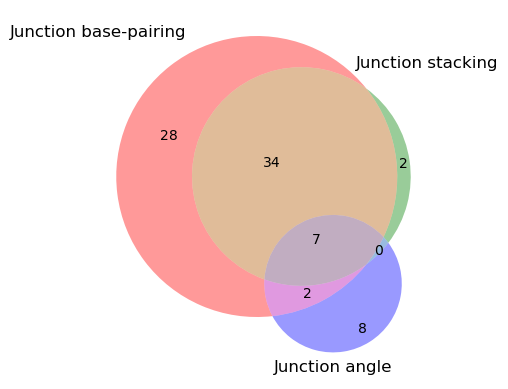

In [30]:
df = df[~(df.pdb.str.contains("DOCKED"))&~(df.pdb.str.contains("TSex"))]
bp = (df.junction_bp).sum() #71
stack = (df.junction_stacking).sum() #43
bp_stack = (df.junction).sum() #41
total = len(df) # 138
angle = df.junction_angle.sum() #18
bp_stack_angle = df.junction_and_angle.sum() #3
bp_angle = (df.junction_angle&df.junction_bp).sum() #3
stack_angle = (df.junction_angle&df.junction_stacking).sum() #3
remainder = total-bp-stack-angle+bp_stack+bp_angle+stack_angle-bp_stack_angle
# A, B, AB, C, AC,BC, ABC
sets = (bp-bp_stack-bp_angle+bp_stack_angle, stack-bp_stack-stack_angle+bp_stack_angle, bp_stack-bp_stack_angle, 
       angle-bp_angle-stack_angle+bp_stack_angle, bp_angle-bp_stack_angle, stack_angle-bp_stack_angle, bp_stack_angle)
venn3(subsets=sets,set_labels=("Junction base-pairing","Junction stacking","Junction angle"))
#plt.text(0.6,0,remainder)

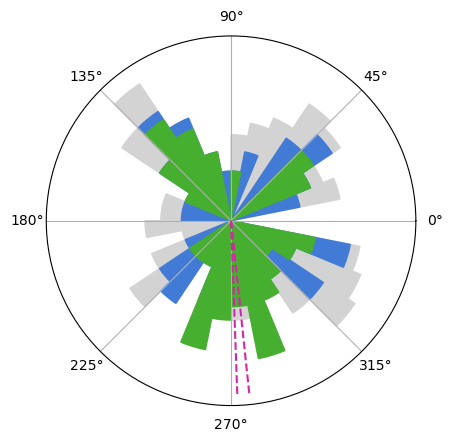

In [32]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'polar'})
# Wrap angles to [-pi, pi) 
def plot_bins(data,ax,color,other_to_count=[]):
    angles = ( data/180) * np.pi
    count, bin = np.histogram(angles, bins=32,range=(-np.pi,np.pi))
    for d in other_to_count:
        count2, bin2 = np.histogram((d/180) * np.pi, bins=32,range=(-np.pi,np.pi))
        count += count2
    radius = (count / np.pi)**.5
    widths = np.diff(bin)
    ax.bar(bin[:-1], radius, zorder=1, align='edge', width=widths,
               edgecolor=color, fill=True, linewidth=1,color=color)

plot_bins(df.angle,ax,'lightgrey')

plot_bins(df[df.junction_bp].angle,ax,'#417bd5',[df[df.junction_stacking & ~ df.junction_bp].angle])
plot_bins(df[df.junction_stacking ].angle,ax,'#46af2f',[df[df.junction_angle].angle])

ax.set_theta_offset(0)
ax.set_yticks([])
expermin = df_[df_.pdb.str.contains("ex")].angle.min()
expermax = df_[df_.pdb.str.contains("ex")].angle.max()
expermin = ( expermin/180) * np.pi
expermax = ( expermax/180) * np.pi
ax.vlines(expermin,0,2,color='#d426a6',linestyle='--')
ax.vlines(expermax,0,2,color='#d426a6',linestyle='--')
plt.savefig('R1149_angle.svg')

In [33]:
cols = ['pdb','junction_bp','junction_stacking','junction_angle','angle','gdt_ts','lddt','tempy_mi','gdt_rank','lddt_rank','mi_rank']
df[(df.gdt_rank<=10)|(df.lddt_rank<=10)|(df.mi_rank<=10)|(df.junction_and_angle)|((df.junction_bp) & 
   ((df.junction_angle) | 
   (df.junction_stacking)))][cols].to_csv("R1149_analyse.csv",index=False)

## R1156

### obtain inf data

rna_calc_inf.py *pdb -t R1156TSex0_0.pdb --renumber-residues

In [35]:
# read inf data
cols = ['chainA','resnumA','chainB','resnumB','x','resA','resB','type','num']

def get_junction_info(df,pdb):
    SL5bp = len(df[(df.resnumA==23) & (df.resnumB==117)])
    SL5abp = len(df[(df.resnumA==24) & (df.resnumB==68)])
    SL5bbp = len(df[(df.resnumA==69) & (df.resnumB==95)])
    SL5cbp = len(df[(df.resnumA==96) & (df.resnumB==116)])
    SL5bp2 = len(df[(df.resnumA==22) & (df.resnumB==118)])
    SL5abp2 = len(df[(df.resnumA==25) & (df.resnumB==67)])
    SL5bbp2 = len(df[(df.resnumA==70) & (df.resnumB==94)])
    SL5cbp2 = len(df[(df.resnumA==97) & (df.resnumB==115)])
    
    SL5_SL5c = len(df[(df.resnumA==23) & (df.resnumB==96)])
    SL5a_SL5b = len(df[(df.resnumA==24) & (df.resnumB==95)])
    SL5_SL5c2 = len(df[(df.resnumA==116) & (df.resnumB==117)])
    SL5a_SL5b2 = len(df[(df.resnumA==68) & (df.resnumB==69)])
    
    SL5_SL5a = len(df[(df.resnumA==23) & (df.resnumB==24)])
    SL5b_SL5c = len(df[(df.resnumA==69) & (df.resnumB==116)])
    SL5_SL5a2 = len(df[(df.resnumA==68) & (df.resnumB==117)])
    SL5b_SL5c2 = len(df[(df.resnumA==95) & (df.resnumB==96)])
    
    SL5c = range(103,110)
    SL5a = range(59,66)
    # get min dist
    SL5a = pdb[pdb.residue_number.isin(SL5a)][['x_coord','y_coord','z_coord']].to_numpy()
    SL5c = pdb[pdb.residue_number.isin(SL5c)][['x_coord','y_coord','z_coord']].to_numpy()
    SL5a_interact_SL5c = np.linalg.norm(SL5a[:,None,:]-SL5c[None,:,:],axis=-1).min()
    #L5a_interact_SL5c = len(df[(df.resnumA.isin(SL5a)) & (df.resnumB.isin(SL5c))])
    return [SL5a_interact_SL5c,SL5bp,SL5abp,SL5bbp,SL5cbp,SL5bp2,SL5abp2,SL5bbp2,SL5cbp2,SL5_SL5c,SL5_SL5c2,SL5a_SL5b,SL5a_SL5b2,SL5_SL5a,SL5_SL5a2,SL5b_SL5c,SL5b_SL5c2]

data = []
for f in glob(f'{location_inf_56}/R1156TS???_?.pdb.outCR'):
    pdb = PandasPdb().read_pdb(f[:-6]).df['ATOM']
    df = pd.read_csv(f,names=cols,skiprows=[0,1],delim_whitespace=True)
    data.append([f]+get_junction_info(df,pdb))

cols = ['pdb','SL5a_interact_SL5c','SL5_bp','SL5a_bp','SL5b_bp','SL5c_bp','SL5_bp2','SL5a_bp2','SL5b_bp2','SL5c_bp2','SL5_SL5c','SL5_SL5c2','SL5a_SL5b','SL5a_SL5b2','SL5_SL5a','SL5_SL5a2','SL5b_SL5c','SL5b_SL5c2']
df = pd.DataFrame(data,columns=cols)
df.pdb = df.pdb.str[-22:-10]

### obtain angular data

```
pymol *pdb
align_all()
rr()
color grey, resid 1-23 or resid 117-135
color blue, resid 24-68
color orange, resid 69-95
color red, resid 96-116
set cartoon_transparency, 0.65, *ex*
save R1156_all.pse
```

```
select res1, resid 24-27 or resid 64-95
select res2, resid 1-23 or resid 96-135
select ref1, (resid 23 or resid 96) and backbone
select ref2, (resid 24 or resid 95) and backbone
select end2a, resid 1-6 or resid 131-135
select end2b, resid 97-102 or resid 110-115
select end1a, resid 78-87
select end1b, resid 24-27 or resid 65-68
run get_all_angles.py #angle_dict_part_SL5a
```

```
select res1, resid 24-27 or resid 64-95
select res2, resid 28-59
select ref1, resid 1-6 or resid 131-135
select ref2, resid 97-102 or resid 110-115
select end2a, resid 28-32 or resi 55-59
select end2b, resid 40-48
select end1a, resid 78-87
select end1b, resid 24-27 or resid 65-68
run get_all_angles.py # angle_dict_SL5ab
```

```
select res1, resid 23-24 and backbone
select res2, resid 95-96 and backbone
select ref1, resid 22-23 or resid 115-118 or resid 96-97
select ref2, resid 24-25 or resid 67-70 or resid 94-95
select end1a, resid 23 and backbone
select end1b, resid 24 and backbone
select end2a, resid 95 and backbone
select end2b, resid 96 and backbone
run get_all_angles.py #junction_direction
```

```
set_view (\
     0.264563650,    0.055409942,    0.962695718,\
     0.958732307,    0.091500245,   -0.268757731,\
    -0.102990426,    0.994149446,   -0.028938632,\
    -0.022380818,   -0.020317137, -324.602569580,\
    81.439727783,   83.339263916,   74.226379395,\
   257.340728760,  391.391265869,  -20.000000000 )

   set_view (\
    -0.845707238,    0.197975069,    0.495412081,\
     0.520012319,    0.098439291,    0.848332405,\
     0.119209327,    0.975134969,   -0.186223477,\
     0.000068054,   -0.022350237, -313.600128174,\
    78.442695618,   81.895034790,   74.274032593,\
   245.845870972,  379.896362305,  -20.000000000 )

# sl5a-SL5c
hide *287_5 and (resid 1-23 or resid 117-135 or resid 69-95 or resid 30-57)
# junction view
hide  *287_5 and (resid 98-114 or resid 1-21 or resid 119-135 or resid 26-66 or resid 71-93)
```

In [37]:
angle_dict_part_SL5a = {'R1156TSex0_0': -92.88539172368483, 'R1156TSex0_1': -94.31549828694715, 'R1156TSex0_2': -94.5045950460215, 'R1156TSex0_3': -95.3380136027476, 'R1156TSex0_4': -95.79138517588537, 'R1156TSex0_5': -93.85137817785916, 'R1156TSex0_6': -93.72279953398761, 'R1156TSex0_7': -93.91822117766489, 'R1156TSex0_8': -93.15011584239254, 'R1156TSex0_9': -94.85179300653849, 'R1156TSex1_0': -90.84513844153975, 'R1156TSex1_1': -92.20615835314798, 'R1156TSex1_2': -90.3061000099361, 'R1156TSex1_3': -89.74670024077683, 'R1156TSex1_4': -92.91899017346542, 'R1156TSex1_5': -91.58407231529144, 'R1156TSex1_6': -91.4275083300999, 'R1156TSex1_7': -93.33170845587537, 'R1156TSex1_8': -94.16007090962282, 'R1156TSex1_9': -90.61778336333087, 'R1156TSex2_0': -90.36271540892193, 'R1156TSex2_1': -89.96525720167048, 'R1156TSex2_2': -90.37222502624446, 'R1156TSex2_3': -90.84228560836333, 'R1156TSex2_4': -93.49133716729924, 'R1156TSex2_5': -89.27536827823815, 'R1156TSex2_6': -92.79624952688584, 'R1156TSex2_7': -90.80508922711279, 'R1156TSex2_8': -87.88056076139246, 'R1156TSex2_9': -92.13302035339295, 'R1156TSex3_0': -92.25473287178016, 'R1156TSex3_1': -90.9805260296422, 'R1156TSex3_2': -89.089490374934, 'R1156TSex3_3': -88.07750056475902, 'R1156TSex3_4': -92.39787972347368, 'R1156TSex3_5': -89.57807076129717, 'R1156TSex3_6': -92.73867303233237, 'R1156TSex3_7': -88.08599099425336, 'R1156TSex3_8': -94.57762245052491, 'R1156TSex3_9': -91.0169807708555, 'R1156TS029_1': -95.8773603380528, 'R1156TS029_2': -133.23683979422557, 'R1156TS029_3': -61.01958684346542, 'R1156TS029_4': 36.821596617830956, 'R1156TS029_5': -175.3257401228738, 'R1156TS035_1': -153.94548886214932, 'R1156TS035_2': -145.14817661154146, 'R1156TS035_3': -157.28042334046947, 'R1156TS035_4': 22.65898717781237, 'R1156TS035_5': -53.06635557980219, 'R1156TS054_1': -88.89432881916875, 'R1156TS054_2': -130.65363209047925, 'R1156TS054_3': -51.69214658384333, 'R1156TS054_4': -49.39574962199302, 'R1156TS054_5': 107.33365907868998, 'R1156TS076_1': 145.91843550229441, 'R1156TS076_2': 118.55718667957171, 'R1156TS076_3': -62.29985753731356, 'R1156TS076_4': -100.19073776096808, 'R1156TS076_5': -59.60223712155605, 'R1156TS081_1': -38.047445106362034, 'R1156TS081_2': -105.83726583952838, 'R1156TS081_3': 51.799834206193864, 'R1156TS081_4': -164.9373811587331, 'R1156TS081_5': -114.59428583306124, 'R1156TS091_1': 177.28771397084677, 'R1156TS091_2': 176.2750593031436, 'R1156TS091_3': -174.3647210891559, 'R1156TS091_4': -171.02370655197146, 'R1156TS091_5': 173.31398286252892, 'R1156TS097_1': 43.597393414233956, 'R1156TS097_2': 144.71836648393125, 'R1156TS097_3': 35.201928957278234, 'R1156TS110_1': -46.3043338820402, 'R1156TS110_2': 44.35613781244394, 'R1156TS110_3': 124.50033771466435, 'R1156TS110_4': -53.19377899356183, 'R1156TS110_5': -121.50517548559824, 'R1156TS119_1': -93.09990114559336, 'R1156TS119_2': -131.51669851296947, 'R1156TS119_3': -51.001265605848126, 'R1156TS119_4': -152.24102944309973, 'R1156TS119_5': -75.27553271452406, 'R1156TS125_1': -49.13405243577657, 'R1156TS125_2': -119.64527651919524, 'R1156TS125_3': 79.03081229835145, 'R1156TS125_4': -49.39574962199302, 'R1156TS125_5': 102.82758943477079, 'R1156TS128_1': -75.52289414143979, 'R1156TS128_2': 23.255193502013096, 'R1156TS128_3': 71.49546644982667, 'R1156TS128_4': -151.23953719798678, 'R1156TS128_5': -89.2553516383103, 'R1156TS131_1': -170.99012556201396, 'R1156TS131_2': -132.56502143509908, 'R1156TS131_3': 166.68801739268, 'R1156TS131_4': 28.478133412338998, 'R1156TS131_5': 147.14946439338019, 'R1156TS147_1': -91.460516068973, 'R1156TS147_2': 93.95096704244821, 'R1156TS147_3': -150.9937215629283, 'R1156TS147_4': -68.65612173696218, 'R1156TS147_5': -138.92375556708015, 'R1156TS177_1': 123.81401085524084, 'R1156TS185_1': -66.36476621321545, 'R1156TS185_2': -65.1974537731348, 'R1156TS185_3': -94.6773728275854, 'R1156TS185_4': 112.8036602119158, 'R1156TS185_5': -129.09330351173077, 'R1156TS227_1': 126.72129743319925, 'R1156TS227_2': 129.6005588128037, 'R1156TS227_3': -103.82548306074253, 'R1156TS227_4': -143.62153468632715, 'R1156TS227_5': 155.39389981686725, 'R1156TS229_1': 65.84245163591625, 'R1156TS229_2': -37.211996524007496, 'R1156TS229_3': -84.08173483444577, 'R1156TS229_4': -127.64984950047236, 'R1156TS229_5': -117.40865275902573, 'R1156TS232_1': -50.07249204855715, 'R1156TS232_2': -61.52761956626981, 'R1156TS232_3': -72.49053989714899, 'R1156TS232_4': 90.98078970338906, 'R1156TS232_5': -45.44882858204977, 'R1156TS235_1': -64.22336806223312, 'R1156TS235_2': -106.87262125594087, 'R1156TS235_3': -50.34931738836004, 'R1156TS235_4': -66.23727445131988, 'R1156TS235_5': -68.76184146938144, 'R1156TS238_1': 149.1820634993547, 'R1156TS238_2': 75.74852190860386, 'R1156TS238_3': 145.26583179932211, 'R1156TS238_4': 152.2381499703716, 'R1156TS238_5': 143.19617033387647, 'R1156TS239_1': 65.84245163591625, 'R1156TS239_2': -55.45510322868575, 'R1156TS239_3': -117.40865275902573, 'R1156TS239_4': -94.00469466512048, 'R1156TS239_5': -84.08173483444577, 'R1156TS245_1': -146.78766272142374, 'R1156TS245_2': -92.86638310140549, 'R1156TS245_3': -137.4432899995835, 'R1156TS245_4': -160.56023073672327, 'R1156TS245_5': -134.62632710610444, 'R1156TS248_1': -153.94548886214932, 'R1156TS248_2': -145.14817661154146, 'R1156TS248_3': -131.9480503394815, 'R1156TS248_4': -53.06635557980219, 'R1156TS248_5': -145.84971560415113, 'R1156TS287_1': -106.98951305697942, 'R1156TS287_2': -79.60006612342112, 'R1156TS287_3': -45.24304703635021, 'R1156TS287_4': 118.58314951391948, 'R1156TS287_5': -9.017276843019912, 'R1156TS385_1': -146.78766272142374, 'R1156TS392_1': 40.11121475118627, 'R1156TS392_2': 35.304706159148516, 'R1156TS392_3': -120.46906491813347, 'R1156TS392_4': 140.9376751791879, 'R1156TS392_5': -60.29244407579981, 'R1156TS416_1': -100.42795841079776, 'R1156TS416_2': -49.13405243577657, 'R1156TS416_3': 52.909855030167556, 'R1156TS416_4': 164.70538012706965, 'R1156TS416_5': -49.39574962199302, 'R1156TS434_1': -109.90319685611921, 'R1156TS434_2': -145.83518446449975, 'R1156TS434_3': -88.06133997122382, 'R1156TS434_4': 88.20501908060167, 'R1156TS434_5': -82.19948819450205, 'R1156TS439_1': -37.211996524007496, 'R1156TS439_2': -61.90190495774197, 'R1156TS439_3': 79.74031117380434, 'R1156TS439_4': 65.84245163591625, 'R1156TS439_5': 32.168064068127435, 'R1156TS470_1': -39.19711143289315, 'R1156TS470_2': -39.623983825177305, 'R1156TS470_3': -40.150946386559525, 'R1156TS470_4': -39.855335303416645, 'R1156TS470_5': -39.194363677954755, 'R1156TS489_1': -39.19711143289315, 'R1156TS489_2': -39.623983825177305, 'R1156TS489_3': -40.150946386559525, 'R1156TS489_4': -39.855335303416645, 'R1156TS489_5': -39.194363677954755}
angle_dict_SL5ab = {'R1156TSex0_0': 78.63415729672597, 'R1156TSex0_1': 76.93352159418943, 'R1156TSex0_2': 77.5567981728105, 'R1156TSex0_3': 77.3424805462924, 'R1156TSex0_4': 76.54143514554438, 'R1156TSex0_5': 78.21688273431941, 'R1156TSex0_6': 78.93258152685776, 'R1156TSex0_7': 78.69730625582606, 'R1156TSex0_8': 78.8945838723306, 'R1156TSex0_9': 77.51982207832485, 'R1156TSex1_0': 66.91629036852558, 'R1156TSex1_1': 66.85841728247145, 'R1156TSex1_2': 68.00224547652628, 'R1156TSex1_3': 64.9905767610581, 'R1156TSex1_4': 66.08252164395776, 'R1156TSex1_5': 63.930012952669266, 'R1156TSex1_6': 63.11999787961664, 'R1156TSex1_7': 61.665603088053324, 'R1156TSex1_8': 63.16543520760112, 'R1156TSex1_9': 65.56133340279477, 'R1156TSex2_0': 55.12833763138276, 'R1156TSex2_1': 58.54210755671391, 'R1156TSex2_2': 57.342390044996215, 'R1156TSex2_3': 60.261320110105316, 'R1156TSex2_4': 56.529193267388436, 'R1156TSex2_5': 62.55721261736664, 'R1156TSex2_6': 60.18504163177844, 'R1156TSex2_7': 60.14605825055285, 'R1156TSex2_8': 50.84807357826061, 'R1156TSex2_9': 54.49079007931789, 'R1156TSex3_0': 37.16785098076575, 'R1156TSex3_1': 36.78322971582974, 'R1156TSex3_2': 39.651555383317415, 'R1156TSex3_3': 36.694171384319496, 'R1156TSex3_4': 33.044647587285795, 'R1156TSex3_5': 34.5463242810199, 'R1156TSex3_6': 33.97135188907424, 'R1156TSex3_7': 39.99826375751403, 'R1156TSex3_8': 36.14236178465763, 'R1156TSex3_9': 35.790268585216836, 'R1156TS029_1': 26.430260648030433, 'R1156TS029_2': 165.98537501970387, 'R1156TS029_3': -31.78402359131727, 'R1156TS029_4': -149.60603902991048, 'R1156TS029_5': -170.1455930808403, 'R1156TS035_1': 104.91746604164473, 'R1156TS035_2': 110.14639801554829, 'R1156TS035_3': -73.19726376832807, 'R1156TS035_4': -92.75721799626498, 'R1156TS035_5': -78.55859813425934, 'R1156TS054_1': -118.68892989049446, 'R1156TS054_2': 126.83880552344338, 'R1156TS054_3': 101.78230632635447, 'R1156TS054_4': 91.102877871963, 'R1156TS054_5': 49.40601794097556, 'R1156TS076_1': 88.23135543734934, 'R1156TS076_2': 90.64198948327704, 'R1156TS076_3': 55.44606820234181, 'R1156TS076_4': 48.70504347849498, 'R1156TS076_5': -93.79726542042172, 'R1156TS081_1': -127.04423143737158, 'R1156TS081_2': -167.11120650801834, 'R1156TS081_3': -92.11449539850594, 'R1156TS081_4': 21.4020406604835, 'R1156TS081_5': 77.99009295118546, 'R1156TS091_1': -150.6752226169998, 'R1156TS091_2': 7.428317112140213, 'R1156TS091_3': -170.101235329066, 'R1156TS091_4': 168.69144254274943, 'R1156TS091_5': 166.16316425707063, 'R1156TS097_1': -36.4019109939047, 'R1156TS097_2': 150.6507139633074, 'R1156TS097_3': 33.39338749154737, 'R1156TS110_1': 56.1624394840636, 'R1156TS110_2': 63.07175859956954, 'R1156TS110_3': -95.20080628195957, 'R1156TS110_4': 74.59093707974428, 'R1156TS110_5': 108.5555592421644, 'R1156TS119_1': -116.3531932523596, 'R1156TS119_2': 65.2582797221744, 'R1156TS119_3': 78.08249916951863, 'R1156TS119_4': 69.60054903618061, 'R1156TS119_5': -75.37186358531487, 'R1156TS125_1': -103.2864738787048, 'R1156TS125_2': 139.12564772704616, 'R1156TS125_3': 72.17343832128653, 'R1156TS125_4': 91.102877871963, 'R1156TS125_5': -57.432217282271395, 'R1156TS128_1': 73.08030283850103, 'R1156TS128_2': 81.3726039298182, 'R1156TS128_3': -84.32728211174933, 'R1156TS128_4': 87.58393254801464, 'R1156TS128_5': 59.07924004964644, 'R1156TS131_1': -13.967249460919886, 'R1156TS131_2': 33.417106395018266, 'R1156TS131_3': -73.49131235341032, 'R1156TS131_4': -177.37977629216857, 'R1156TS131_5': 18.323544069900798, 'R1156TS147_1': 51.226338117761486, 'R1156TS147_2': -100.74175352295318, 'R1156TS147_3': -116.87039630889106, 'R1156TS147_4': 127.6164326666819, 'R1156TS147_5': -150.0088023451527, 'R1156TS177_1': -91.64396623043271, 'R1156TS185_1': -26.481262149515434, 'R1156TS185_2': -123.27138528837007, 'R1156TS185_3': 158.57367967040466, 'R1156TS185_4': -135.44841810184536, 'R1156TS185_5': -90.15189195980973, 'R1156TS227_1': 78.78439570460942, 'R1156TS227_2': -98.06465734267223, 'R1156TS227_3': -62.72597369803267, 'R1156TS227_4': -87.79727663966273, 'R1156TS227_5': 83.37491103825658, 'R1156TS229_1': -80.12548846482824, 'R1156TS229_2': 109.15600358412934, 'R1156TS229_3': 51.29394903234879, 'R1156TS229_4': 76.42906182511368, 'R1156TS229_5': -125.14718409136478, 'R1156TS232_1': -67.57021572592622, 'R1156TS232_2': -85.32428934663194, 'R1156TS232_3': 53.672196245323434, 'R1156TS232_4': 104.83998587941949, 'R1156TS232_5': -43.15580815995831, 'R1156TS235_1': -97.15582886918723, 'R1156TS235_2': -116.7202345720022, 'R1156TS235_3': 101.3139548202939, 'R1156TS235_4': -109.20063530426947, 'R1156TS235_5': -144.08766826997115, 'R1156TS238_1': -82.71277325461121, 'R1156TS238_2': 76.11444661553587, 'R1156TS238_3': -83.79606996507492, 'R1156TS238_4': -79.97966395302312, 'R1156TS238_5': -87.7871742174989, 'R1156TS239_1': -80.12548846482824, 'R1156TS239_2': -89.03793515197891, 'R1156TS239_3': -125.14718409136478, 'R1156TS239_4': -54.01539197344188, 'R1156TS239_5': 51.29394903234879, 'R1156TS245_1': -57.10468426069309, 'R1156TS245_2': -40.0336005644577, 'R1156TS245_3': 16.433313746155857, 'R1156TS245_4': 66.59078048218825, 'R1156TS245_5': 157.2367648767095, 'R1156TS248_1': 104.91746604164473, 'R1156TS248_2': 110.14639801554829, 'R1156TS248_3': 104.06080277659822, 'R1156TS248_4': -78.55859813425934, 'R1156TS248_5': -120.87464839762897, 'R1156TS287_1': 82.32699083516523, 'R1156TS287_2': -145.13445605838785, 'R1156TS287_3': -99.18098709308741, 'R1156TS287_4': 92.24629373853598, 'R1156TS287_5': -89.52142536109658, 'R1156TS385_1': -57.10468426069309, 'R1156TS392_1': -54.811056235865145, 'R1156TS392_2': 87.13597730428243, 'R1156TS392_3': 18.421461742243018, 'R1156TS392_4': -84.29065100759111, 'R1156TS392_5': -73.28930798086188, 'R1156TS416_1': -76.00506406543198, 'R1156TS416_2': -103.2864738787048, 'R1156TS416_3': 79.1994158718244, 'R1156TS416_4': 139.78590132517309, 'R1156TS416_5': 91.102877871963, 'R1156TS434_1': 117.64358230708798, 'R1156TS434_2': -80.98960028018621, 'R1156TS434_3': 130.97106085409482, 'R1156TS434_4': 84.65768721817147, 'R1156TS434_5': -73.45788466844219, 'R1156TS439_1': 109.15600358412934, 'R1156TS439_2': 15.829441840574196, 'R1156TS439_3': 44.989591698383194, 'R1156TS439_4': -80.12548846482824, 'R1156TS439_5': -172.7457122897065, 'R1156TS470_1': 71.19498305764682, 'R1156TS470_2': 73.6183246913412, 'R1156TS470_3': 71.64603132735625, 'R1156TS470_4': 71.65324502054024, 'R1156TS470_5': 74.47472147051393, 'R1156TS489_1': 71.19498305764682, 'R1156TS489_2': 73.6183246913412, 'R1156TS489_3': 71.64603132735625, 'R1156TS489_4': 71.65324502054024, 'R1156TS489_5': -103.7588585132246}
junction_direction = {'R1156TSex0_0': -104.70488611785106, 'R1156TSex0_1': -108.6887671806165, 'R1156TSex0_2': -102.13427679509105, 'R1156TSex0_3': -97.05253659088125, 'R1156TSex0_4': -104.71402928347254, 'R1156TSex0_5': -106.89155878049341, 'R1156TSex0_6': -109.03261366182132, 'R1156TSex0_7': -103.32526949168681, 'R1156TSex0_8': -94.66744244873121, 'R1156TSex0_9': -105.9209492241103, 'R1156TSex1_0': -113.85749312250641, 'R1156TSex1_1': -110.6888419727528, 'R1156TSex1_2': -111.84497682794344, 'R1156TSex1_3': -115.43856990292247, 'R1156TSex1_4': -115.52101288088383, 'R1156TSex1_5': -104.37152999822875, 'R1156TSex1_6': -112.40996133938735, 'R1156TSex1_7': -101.57825163553966, 'R1156TSex1_8': -100.35665827878998, 'R1156TSex1_9': -108.53713263942755, 'R1156TSex2_0': -135.8551123983756, 'R1156TSex2_1': -153.43371248055286, 'R1156TSex2_2': -163.19274248972798, 'R1156TSex2_3': -158.62383994560145, 'R1156TSex2_4': -148.653200053421, 'R1156TSex2_5': -158.17768973244733, 'R1156TSex2_6': -135.18741503569913, 'R1156TSex2_7': 136.79592950732808, 'R1156TSex2_8': -125.66477071990695, 'R1156TSex2_9': -153.8393263107597, 'R1156TSex3_0': -114.19884312536999, 'R1156TSex3_1': -113.44234790427208, 'R1156TSex3_2': -117.45381720405146, 'R1156TSex3_3': -121.76512995642643, 'R1156TSex3_4': -121.33579375269544, 'R1156TSex3_5': -123.41380589419327, 'R1156TSex3_6': -113.41915255257776, 'R1156TSex3_7': -119.34702914229732, 'R1156TSex3_8': -115.99435196090965, 'R1156TSex3_9': 139.9886040552291, 'R1156TS029_1': -104.06807986467722, 'R1156TS029_2': -144.11178101190382, 'R1156TS029_3': 43.18052205371927, 'R1156TS029_4': -85.48924532445632, 'R1156TS029_5': -121.82074423562882, 'R1156TS035_1': -67.01568924427342, 'R1156TS035_2': -71.17241453763673, 'R1156TS035_3': -67.29788974904915, 'R1156TS035_4': -111.02276742332087, 'R1156TS035_5': -175.4784291496026, 'R1156TS054_1': 154.71188441939051, 'R1156TS054_2': -91.33533696917499, 'R1156TS054_3': 89.39647685650039, 'R1156TS054_4': 45.896143538552444, 'R1156TS054_5': 68.26939575202731, 'R1156TS076_1': -144.34435928466522, 'R1156TS076_2': -175.5080411715037, 'R1156TS076_3': -95.59556837667209, 'R1156TS076_4': 129.19237577714233, 'R1156TS076_5': -131.2349508459978, 'R1156TS081_1': -111.3279163486218, 'R1156TS081_2': 115.14225713645313, 'R1156TS081_3': -150.48743770179428, 'R1156TS081_4': -70.3370047805012, 'R1156TS081_5': 116.89828507308746, 'R1156TS091_1': 70.5981010950301, 'R1156TS091_2': 164.3667587975725, 'R1156TS091_3': -119.42632767138834, 'R1156TS091_4': -75.46241509093805, 'R1156TS091_5': 103.88759415017712, 'R1156TS097_1': 15.885566396924467, 'R1156TS097_2': -42.149058544431256, 'R1156TS097_3': -47.289251099502536, 'R1156TS110_1': -161.76378328468, 'R1156TS110_2': 94.20079488758456, 'R1156TS110_3': -39.548249629466355, 'R1156TS110_4': -171.6024395500625, 'R1156TS110_5': 110.38427091527029, 'R1156TS119_1': 157.17328509631304, 'R1156TS119_2': -82.0992487876302, 'R1156TS119_3': -150.37491871866234, 'R1156TS119_4': -81.16246673682834, 'R1156TS119_5': -86.13193155284186, 'R1156TS125_1': -47.38552543317649, 'R1156TS125_2': -109.77494856997849, 'R1156TS125_3': -135.04371081719756, 'R1156TS125_4': 45.896143538552444, 'R1156TS125_5': 85.08709811945688, 'R1156TS128_1': -130.4489385662314, 'R1156TS128_2': 125.45128206391361, 'R1156TS128_3': -92.63256711778222, 'R1156TS128_4': -75.46407217857123, 'R1156TS128_5': -143.29183490708286, 'R1156TS131_1': 148.33713837680256, 'R1156TS131_2': -50.37313322528365, 'R1156TS131_3': -137.1293991091914, 'R1156TS131_4': -84.98545829557241, 'R1156TS131_5': 114.06621404949584, 'R1156TS147_1': -30.857540344757773, 'R1156TS147_2': 152.6783602052344, 'R1156TS147_3': 145.11290480284683, 'R1156TS147_4': -136.47418500981766, 'R1156TS147_5': 71.72726599187477, 'R1156TS177_1': -113.12322511443682, 'R1156TS185_1': -85.1360264740814, 'R1156TS185_2': -43.966852034053304, 'R1156TS185_3': -100.56348185980653, 'R1156TS185_4': -96.52987975560835, 'R1156TS185_5': -82.78062646941589, 'R1156TS227_1': -38.41453586336789, 'R1156TS227_2': -137.41320036828964, 'R1156TS227_3': -144.9331876526785, 'R1156TS227_4': -136.87979644037048, 'R1156TS227_5': 134.53874688767033, 'R1156TS229_1': -163.39830873691878, 'R1156TS229_2': 127.2334719404753, 'R1156TS229_3': 136.5324038932867, 'R1156TS229_4': 83.49313336076477, 'R1156TS229_5': 85.61867816781402, 'R1156TS232_1': -143.06210415073102, 'R1156TS232_2': -147.86098206897816, 'R1156TS232_3': -145.27932703745407, 'R1156TS232_4': 139.10492638407715, 'R1156TS232_5': -142.2354542222058, 'R1156TS235_1': -51.46416348645758, 'R1156TS235_2': -62.84155518181297, 'R1156TS235_3': -95.5564019166694, 'R1156TS235_4': -106.77374405652924, 'R1156TS235_5': -122.15760538635631, 'R1156TS238_1': -58.86098348014064, 'R1156TS238_2': -59.39453061331575, 'R1156TS238_3': -61.856434069368106, 'R1156TS238_4': -81.47835509940094, 'R1156TS238_5': -62.724018616225585, 'R1156TS239_1': -163.39830873691878, 'R1156TS239_2': -43.710204473251345, 'R1156TS239_3': 85.61867816781402, 'R1156TS239_4': 87.77434661263543, 'R1156TS239_5': 136.5324038932867, 'R1156TS245_1': 77.6725590533735, 'R1156TS245_2': 73.04143135442767, 'R1156TS245_3': -35.97281796010553, 'R1156TS245_4': -98.34351749874938, 'R1156TS245_5': 135.64332594143005, 'R1156TS248_1': -67.01568924427342, 'R1156TS248_2': -71.17241453763673, 'R1156TS248_3': -77.76308068604884, 'R1156TS248_4': -175.4784291496026, 'R1156TS248_5': -137.44172235949273, 'R1156TS287_1': -89.9679189943476, 'R1156TS287_2': 99.06954287181166, 'R1156TS287_3': -131.78662564188315, 'R1156TS287_4': -178.74937652968907, 'R1156TS287_5': 107.43068417898759, 'R1156TS385_1': 77.6725590533735, 'R1156TS392_1': -158.50135004775942, 'R1156TS392_2': 106.95839874856897, 'R1156TS392_3': 150.48668295960815, 'R1156TS392_4': 137.80680606255274, 'R1156TS392_5': 90.52524407567425, 'R1156TS416_1': 128.0140084386747, 'R1156TS416_2': -47.38552543317649, 'R1156TS416_3': 147.1488018424873, 'R1156TS416_4': 114.63597993984716, 'R1156TS416_5': 45.896143538552444, 'R1156TS434_1': 152.02861577928925, 'R1156TS434_2': 91.70561037029493, 'R1156TS434_3': 166.59360714395405, 'R1156TS434_4': -60.25048433600619, 'R1156TS434_5': 62.56708292212986, 'R1156TS439_1': 127.2334719404753, 'R1156TS439_2': 141.5793268338746, 'R1156TS439_3': 103.12041013857628, 'R1156TS439_4': -163.39830873691878, 'R1156TS439_5': -4.957015483101226, 'R1156TS470_1': 159.7005961470939, 'R1156TS470_2': -166.23924161414683, 'R1156TS470_3': 163.44489301547125, 'R1156TS470_4': 145.11644364258441, 'R1156TS470_5': 158.59610234841628, 'R1156TS489_1': 159.7005961470939, 'R1156TS489_2': -166.23924161414683, 'R1156TS489_3': 163.44489301547125, 'R1156TS489_4': 145.11644364258441, 'R1156TS489_5': 158.59610234841628}

df['angle_part_SL5a'] = df.pdb.map(angle_dict_part_SL5a)
df['angle_SL5ab'] = df.pdb.map(angle_dict_SL5ab)
df['junction_direction'] = df.pdb.map(junction_direction)

df['gr_code'] = df.pdb.str[-5:-2]
df['model'] = df.pdb.str[-1]
df_values = pd.read_csv('../results/rna_all_score_per_model_230403.csv')
df_values = df_values[df_values.target=="R1156"]
df_values['gr_code'] = df_values['gr_code'].apply(lambda x: '{0:0>3}'.format(x))
df_values['model'] = df_values.model.astype(str)
df = df.merge(df_values,on=['gr_code','model'],how="outer")
df['gdt_rank'] = df.gdt_ts.rank(ascending=False)
df['lddt_rank'] = df.lddt.rank(ascending=False)
df['mi_rank'] = df.tempy_mi.rank(ascending=False)

In [38]:
at_least_7_junction_bps = (df.SL5_bp+df.SL5a_bp+df.SL5b_bp+df.SL5c_bp+df.SL5_bp2+df.SL5a_bp2+df.SL5b_bp2+df.SL5c_bp2)>=7 # 71/138
no_incorrect_junction_stacking = (df.SL5_SL5a==0) & (df.SL5_SL5a2==0) & (df.SL5b_SL5c==0) & (df.SL5b_SL5c2==0) # 69/138
at_least_2_junction_stacking = (df.SL5_SL5c + df.SL5_SL5c2 + df.SL5a_SL5b + df.SL5a_SL5b) >= 2 # 50/138
at_least_3_junction_stacking = (df.SL5_SL5c + df.SL5_SL5c2 + df.SL5a_SL5b + df.SL5a_SL5b) >= 3 # 42/138
angle_within_30ish = (df.angle_part_SL5a>-120) & (df.angle_part_SL5a<-60)
sl5a_sl5c_interact = df.SL5a_interact_SL5c<3.5
antiparrallel = (df.junction_direction<-90) | (df.junction_direction>90)

df['junction_bp'] = at_least_7_junction_bps
df['junction_stacking'] = no_incorrect_junction_stacking&at_least_3_junction_stacking
df['junction'] = at_least_7_junction_bps& no_incorrect_junction_stacking&at_least_3_junction_stacking
df['junction_angle'] = angle_within_30ish & antiparrallel
df['junction_and_angle'] = df.junction & df.junction_angle
df['5a_5c_interaction'] = sl5a_sl5c_interact
df['junction_and_angle_and_interaction'] = df.junction_and_angle & sl5a_sl5c_interact
df_ = df.copy()

Text(0.6, 0, '76')

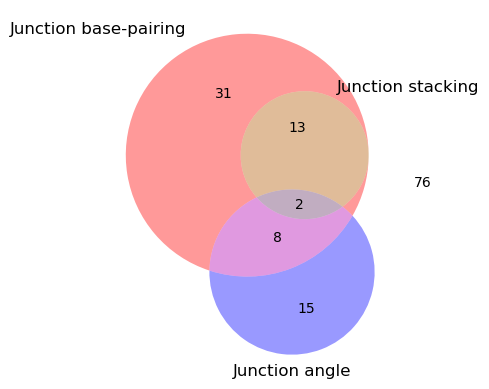

In [39]:
df = df[~(df.pdb.str.contains("DOCKED"))&~(df.pdb.str.contains("ex"))]
bp = (df.junction_bp).sum() #71
stack = (df.junction_stacking).sum() #43
bp_stack = (df.junction).sum() #41
total = len(df) # 138
angle = df.junction_angle.sum() #18
bp_stack_angle = df.junction_and_angle.sum() #3
bp_angle = (df.junction_angle&df.junction_bp).sum() #3
stack_angle = (df.junction_angle&df.junction_stacking).sum() #3
remainder = total-bp-stack-angle+bp_stack+bp_angle+stack_angle-bp_stack_angle
# A, B, AB, C, AC,BC, ABC
sets = (bp-bp_stack-bp_angle+bp_stack_angle, stack-bp_stack-stack_angle+bp_stack_angle, bp_stack-bp_stack_angle, 
       angle-bp_angle-stack_angle+bp_stack_angle, bp_angle-bp_stack_angle, stack_angle-bp_stack_angle, bp_stack_angle)
venn3(subsets=sets,set_labels=("Junction base-pairing","Junction stacking","Junction angle"))
plt.text(0.6,0,remainder)

In [40]:
print(df['5a_5c_interaction'].sum())
print((df['5a_5c_interaction'] & df.junction_and_angle).sum())
print((df['5a_5c_interaction'] & df.junction_angle).sum())
print((df['5a_5c_interaction'] & df.junction_stacking).sum())
print((df['5a_5c_interaction'] & df.junction_bp).sum())
print((df['5a_5c_interaction'] & df.junction).sum())
print((df['5a_5c_interaction'] & df.junction_angle & df.junction_bp).sum())
print((df['5a_5c_interaction'] & df.junction_angle & df.junction_stacking).sum())
print(len(df))
print(28+10+8+1+1+3+3+3+15+73)

13
1
1
4
7
4
1
1
145
145


In [44]:
cols = ['pdb','junction_bp','junction_stacking','junction_angle','5a_5c_interaction','angle_part_SL5a','angle_SL5ab','gdt_ts','lddt','tempy_mi','global_rmsd','gdt_rank','lddt_rank','mi_rank']
df[(df.gdt_rank<=10)|(df.lddt_rank<=10)|(df.mi_rank<=10)|(df.junction_and_angle)|((df.junction_bp) & 
   ((df.junction_angle) | 
   (df.junction_stacking) |
   (df['5a_5c_interaction'])))][cols].to_csv('R1156_analyse.csv')

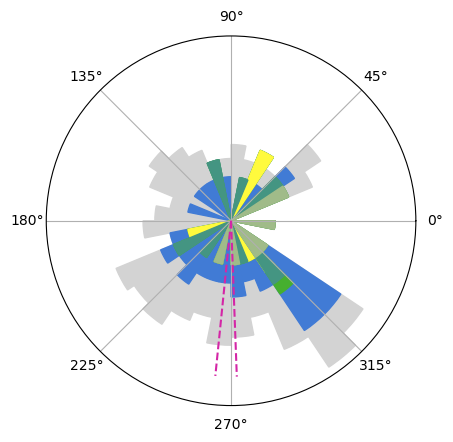

In [42]:
# Wrap angles to [-pi, pi) 
def plot_bins(data,ax,color,other_to_count=[]):
    angles = ( data/180) * np.pi
    count, bin = np.histogram(angles, bins=32,range=(-np.pi,np.pi))
    for d in other_to_count:
        count2, bin2 = np.histogram((d/180) * np.pi, bins=32,range=(-np.pi,np.pi))
        count += count2
    #area = count / angles.size
    #radius = (area / np.pi)**.5
    radius = (count / np.pi)**.5
    widths = np.diff(bin)
    ax.bar(bin[:-1], radius, zorder=1, align='edge', width=widths,
               edgecolor=color, fill=True, linewidth=1,color=color)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'polar'})

plot_bins(df.angle_part_SL5a,ax,'lightgrey')

plot_bins(df[df.junction_bp].angle_part_SL5a,ax,'#417bd5',[df[df.junction_stacking & ~df.junction_bp].angle_part_SL5a,df[df['5a_5c_interaction'] & ~df.junction_bp].angle_part_SL5a])
plot_bins(df[df.junction_stacking].angle_part_SL5a,ax,'#46af2f',[df[df['5a_5c_interaction']  & ~df.junction_stacking].angle_part_SL5a])
plot_bins(df[df['5a_5c_interaction']].angle_part_SL5a,ax,'#fffa3d')


plot_bins(df[df.junction_bp&df.junction_stacking].angle_part_SL5a,ax,'#449582',[df[(df.junction_bp&df['5a_5c_interaction']) & ~(df.junction_bp&df.junction_stacking)].angle_part_SL5a])
plot_bins(df[df.junction_bp&df['5a_5c_interaction']].angle_part_SL5a,ax,'#A0BB89')

ax.set_theta_offset(0)
ax.set_yticks([])
expermin = df_[df_.pdb.str.contains("ex")].angle_part_SL5a.min()
expermax = df_[df_.pdb.str.contains("ex")].angle_part_SL5a.max()
expermin = ( expermin/180) * np.pi
expermax = ( expermax/180) * np.pi
ax.vlines(expermin,0,2,color='#d426a6',linestyle='--')
ax.vlines(expermax,0,2,color='#d426a6',linestyle='--')
plt.savefig('R1156_angle.svg')

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  6  5  4 10  8 26 23
 15 15  7  6  5  5  5  4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 7 1 1 0 1 0 0 0 0]


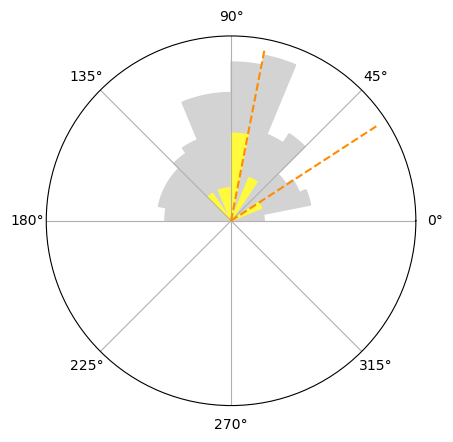

In [43]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'polar'})

def plot_bins(data,ax,color,other_to_count=[]):
    # in this case no neg
    angles = ( np.abs(data)/180) * np.pi
    count, bin = np.histogram(angles, bins=32,range=(-np.pi,np.pi))
    print(count)
    for d in other_to_count:
        count2, bin2 = np.histogram((np.abs(d)/180) * np.pi, bins=32,range=(-np.pi,np.pi))
        count += count2
    #area = count / angles.size
    #radius = (area / np.pi)**.5
    radius = (count / np.pi)**.5
    widths = np.diff(bin)
    ax.bar(bin[:-1], radius, zorder=1, align='edge', width=widths,
               edgecolor=color, fill=True, linewidth=1,color=color)

plot_bins(df.angle_SL5ab,ax,'lightgrey')

plot_bins(df[df['5a_5c_interaction']].angle_SL5ab,ax,'#fffa3d')

ax.set_theta_offset(0)
ax.set_yticks([])
expermin = df_[df_.pdb.str.contains("ex")].angle_SL5ab.min()
expermax = df_[df_.pdb.str.contains("ex")].angle_SL5ab.max()
expermin = ( expermin/180) * np.pi
expermax = ( expermax/180) * np.pi
ax.vlines(expermin,0,3,color='darkorange',linestyle='--')
ax.vlines(expermax,0,3,color='darkorange',linestyle='--')
plt.savefig('R1156_5a_angle.svg')